In [1]:
import numpy as np
import cv2 as cv
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

from ipywidgets import interactive, widgets, Layout

%matplotlib inline 

In [2]:
from pv_vision.transform_crop.solarmodule import MaskModule

Proceso de un panel con un fondo complejo

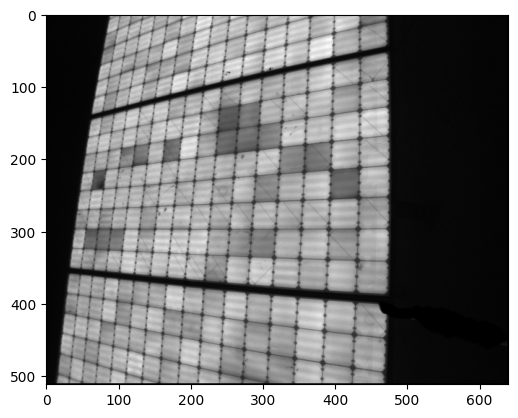

In [3]:
# load the grayscale image
# create a raw module instance

img = cv.imread('/home/franklin/PVDefectDetect/EjemplosPV-vision/module_imgs/example_1.png', cv.IMREAD_UNCHANGED)
raw_module = MaskModule(img, 8, 16, 0) # 8 rows && 16 columns && 0 busbar
plt.imshow(raw_module.image, 'gray')

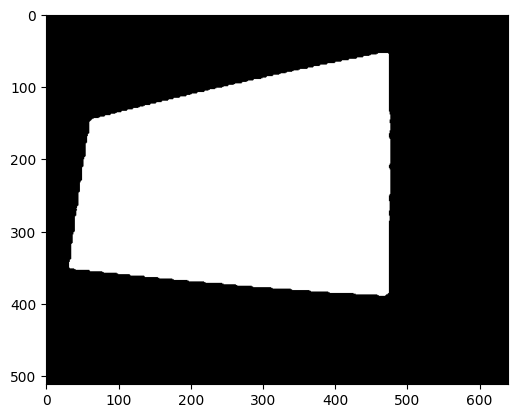

In [4]:
# Cargar la máscara predicha por UNet.
# Establece el parámetro "output=True" en load_mask() si deseas obtener la máscara como salida.

raw_module.load_mask('/home/franklin/PVDefectDetect/EjemplosPV-vision/module_imgs/example_1.png.json')
plt.imshow(raw_module.mask, 'gray')

In [5]:
# Búsqueda de esquinas 

def update_corner(mode):
    corners = raw_module.corner_detection_cont(output=True, mode=mode)
    x, y = zip(*corners)

    plt.figure(figsize=(8, 6))
    plt.imshow(raw_module.mask, 'gray')
    plt.scatter(x, y, c='r')

mode=widgets.IntSlider(value=4, min=0, max=4, step=1)
interactive(update_corner,
            mode=mode)

interactive(children=(IntSlider(value=4, description='mode', max=4), Output()), _dom_classes=('widget-interact…

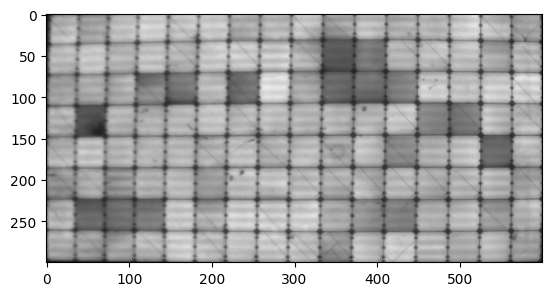

In [6]:
# Transformación de perpectivas

# do perspective transform
img_transformed = raw_module.transform(width=600, height=300, img_only=True)
plt.imshow(img_transformed, 'gray')
# you can also set "img_only=False" to output a transformed module instance. This will be useful
# when you want to crop out single cells

In [7]:
# Ajuste para bordes verticales

def update_edges(vl_split_size, vl_interval, vl_margin, vl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[5, 8, 12], split_size=vl_split_size,
                          interval=vl_interval, margin=vl_margin, thre=vl_thre, direction=0)

inner_edges_para = {
    'vl_interval': widgets.IntText(value=40),
    'vl_thre': widgets.FloatText(value=0.9),
    'vl_split_size': widgets.IntText(value=20),
    'vl_margin': widgets.IntText(value=40)
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=20, description='vl_split_size'), IntText(value=40, description='vl_interv…

In [8]:
# Configuración de bordes horizontales

def update_edges(hl_split_size, hl_interval, hl_margin, hl_thre):
    fig = plt.figure(figsize=(8, 6))
    raw_module.plot_peaks(n_list=[5, 8, 12], split_size=hl_split_size,
                          interval=hl_interval, margin=hl_margin, thre=hl_thre, direction=1)

inner_edges_para = {
    'hl_interval': widgets.IntText(value=50),
    'hl_thre': widgets.FloatText(value=0.9),
    'hl_split_size': widgets.IntText(value=20),
    'hl_margin': widgets.IntText(value=20)
}

interactive(update_edges, **inner_edges_para)

interactive(children=(IntText(value=20, description='hl_split_size'), IntText(value=50, description='hl_interv…

In [17]:
# Recorte de celdas

single_cells = raw_module.crop_cell(32, plot=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [18]:
plt.imshow(single_cells[10], 'gray')

NameError: name 'single_cells' is not defined